<a href="https://colab.research.google.com/github/Enzoete/ExamenFinal_TancaraEnzo/blob/main/IA_deteccion_de_poses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar las librerías necesarias
!pip install mediapipe opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
grpcio-

Saving imagen3.jpg to imagen3.jpg


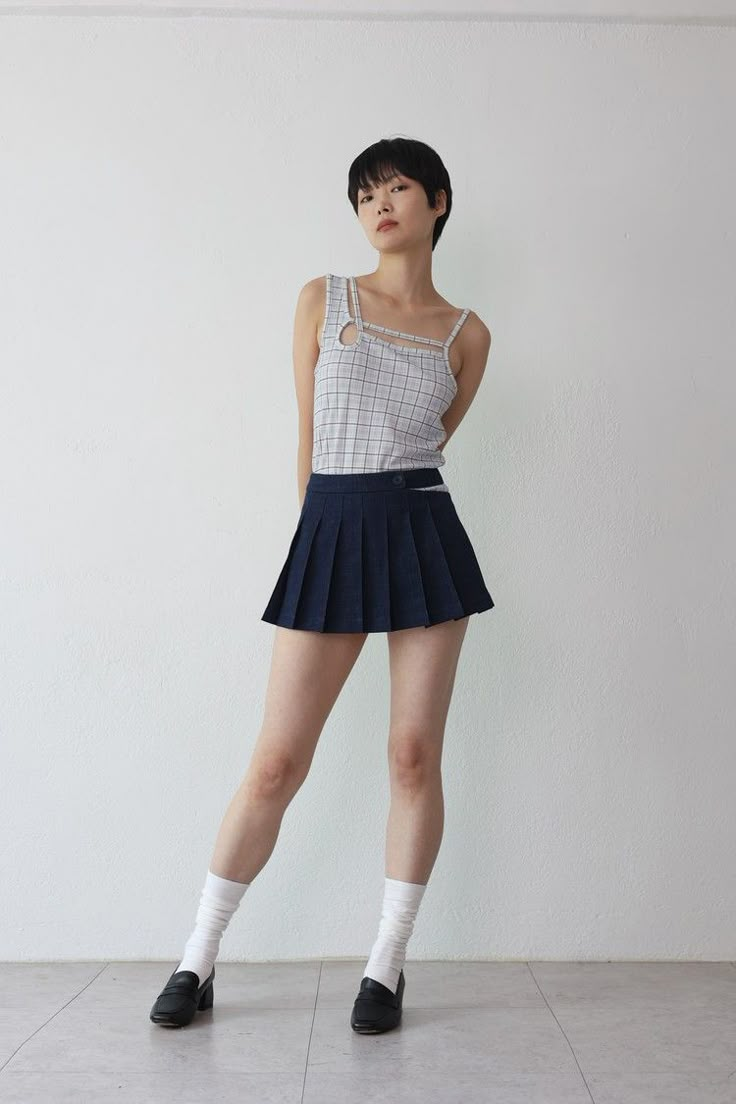

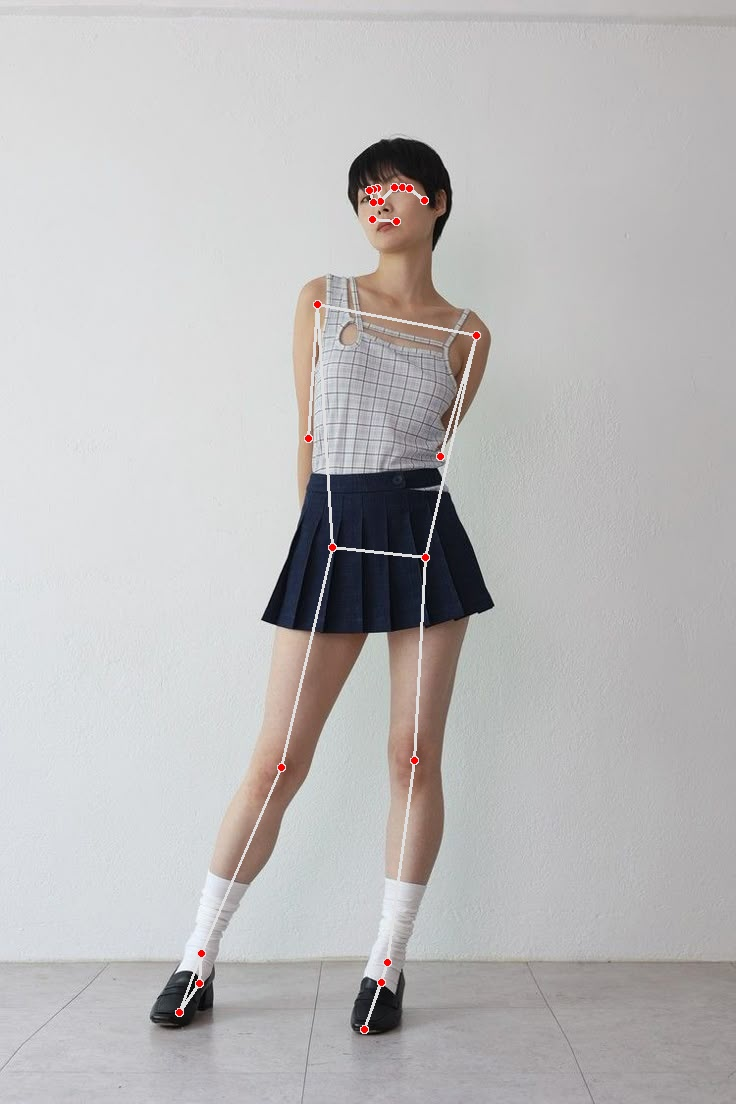

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:


# Importar librerías
import cv2
import mediapipe as mp
import json
from google.colab import files
from PIL import Image
from IPython.display import display

# Subir imagen
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Cargar imagen
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar imagen original
display(Image.open(image_path))

# Inicializar MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)
mp_drawing = mp.solutions.drawing_utils

# Procesar la imagen
results = pose.process(image_rgb)

# Dibujar la pose (opcional)
if results.pose_landmarks:
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    cv2.imwrite("pose_detected.jpg", image)
    display(Image.open("pose_detected.jpg"))

# Extraer y guardar puntos clave en 2D
keypoints_2d = {}
if results.pose_landmarks:
    for idx, lm in enumerate(results.pose_landmarks.landmark):
        keypoints_2d[f"landmark_{idx}"] = {
            "x": lm.x,
            "y": lm.y
        }

    with open("pose_data_2D.json", "w") as f:
        json.dump(keypoints_2d, f, indent=2)

# Descargar el archivo JSON
files.download("pose_data_2D.json")


Saving 360_F_1071830912_cw1moH2sJkgo5tHgEKc3RubXKgk2oHQM.jpg to 360_F_1071830912_cw1moH2sJkgo5tHgEKc3RubXKgk2oHQM.jpg


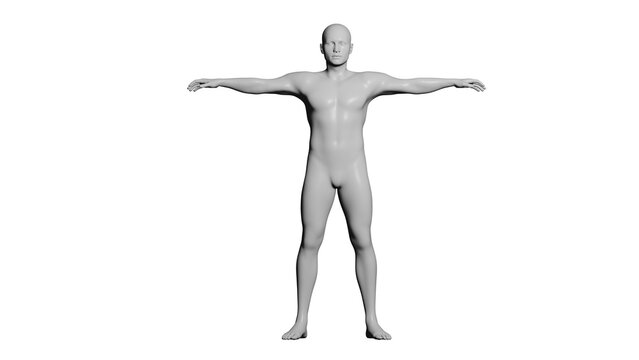

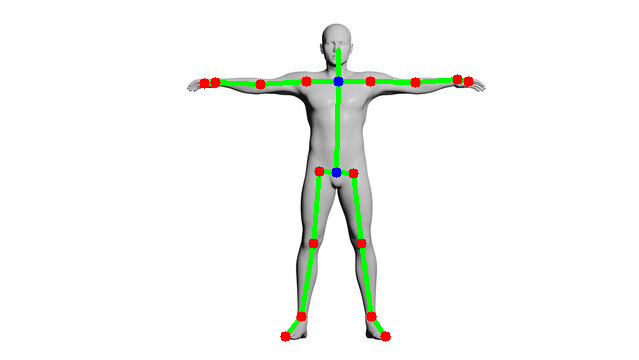

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# 📥 Subir imagen
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# 🔧 Librerías
import cv2
import mediapipe as mp
import json
from PIL import Image
from IPython.display import display

# 🖼️ Cargar imagen
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, _ = image.shape

# Mostrar imagen original
display(Image.open(image_path))

# 🕺 Detección de pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)
results = pose.process(image_rgb)

# 🎨 Visualización y extracción
image_stick = image_rgb.copy()
keypoints_2d = {}

if results.pose_landmarks:
    lm = results.pose_landmarks.landmark

    # Coordenadas hombros y caderas
    l_shoulder, r_shoulder = lm[11], lm[12]
    l_hip, r_hip = lm[23], lm[24]

    # Punto medio del cuello
    neck_x = (l_shoulder.x + r_shoulder.x) / 2
    neck_y = (l_shoulder.y + r_shoulder.y) / 2
    keypoints_2d["landmark_100"] = {"x": neck_x, "y": neck_y}

    # Punto medio de la cadera
    hip_x = (l_hip.x + r_hip.x) / 2
    hip_y = (l_hip.y + r_hip.y) / 2
    keypoints_2d["landmark_101"] = {"x": hip_x, "y": hip_y}

    # Guardar puntos reales necesarios
    indices = [0, 11, 12, 13, 14, 15, 16, 21, 22,
               23, 24, 25, 26, 27, 28, 31, 32]
    for idx in indices:
        keypoints_2d[f"landmark_{idx}"] = {"x": lm[idx].x, "y": lm[idx].y}

    # Conexiones stickman
    connections = [
        (0, 100),         # Cabeza a cuello
        (100, 11), (100, 12),  # Cuello a hombros
        (100, 101),       # Cuello a cadera central
        (101, 23), (101, 24),  # Cadera central a caderas

        (11, 13), (13, 15), (15, 21),  # Brazo izq
        (12, 14), (14, 16), (16, 22),  # Brazo der

        (23, 25), (25, 27), (27, 31),  # Pierna izq
        (24, 26), (26, 28), (28, 32)   # Pierna der
    ]

    # Dibujar líneas
    for start, end in connections:
        def get_coords(idx):
            if idx == 100:
                return int(neck_x * w), int(neck_y * h)
            elif idx == 101:
                return int(hip_x * w), int(hip_y * h)
            else:
                return int(lm[idx].x * w), int(lm[idx].y * h)

        p1 = get_coords(start)
        p2 = get_coords(end)
        cv2.line(image_stick, p1, p2, (0, 255, 0), 3)

    # Articulaciones visibles (incluye hombros y caderas)
    articulaciones = [11, 12, 13, 14, 15, 16, 21, 22,
                      23, 24, 25, 26, 27, 28, 31, 32]
    for idx in articulaciones:
        cx, cy = int(lm[idx].x * w), int(lm[idx].y * h)
        cv2.circle(image_stick, (cx, cy), 5, (255, 0, 0), -1)

    # Cuello y cadera central en rojo
    cv2.circle(image_stick, (int(neck_x * w), int(neck_y * h)), 5, (0, 0, 255), -1)
    cv2.circle(image_stick, (int(hip_x * w), int(hip_y * h)), 5, (0, 0, 255), -1)

# 🖼️ Mostrar resultado final
display(Image.fromarray(image_stick))

# 💾 Guardar JSON
with open("pose_data_2D.json", "w") as f:
    json.dump(keypoints_2d, f, indent=2)

# 📤 Descargar JSON
files.download("pose_data_2D.json")